In [1]:
# import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

load data

In [2]:
data = pd.read_csv("./machine learning datasets/3.01. Country clusters.csv")
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


Latitude and logitude were gotten from google search of location and then convert their respective results in latitude and longitude to degree decimal values

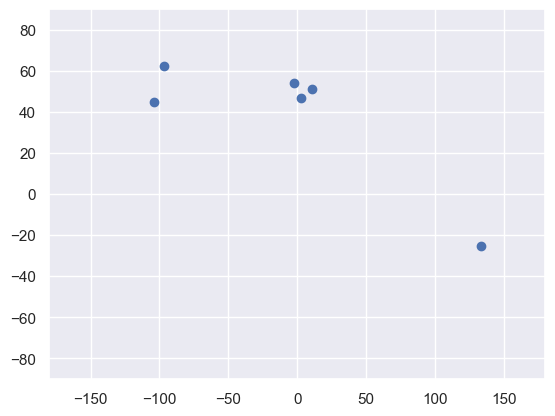

In [4]:
# plot the data
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

select feature

In [5]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


clustering

In [11]:
kmean = KMeans(3) #KMeans is the method we imported from sklearn and the value in the bracket2 is the number of cluster we want to produce
kmean.fit(x)

KMeans(n_clusters=3)

clustering result

In [12]:
identified_cluster = kmean.fit_predict(x)
identified_cluster

array([0, 0, 1, 1, 1, 2])

we can see clearly 2 cluster from this result(0,1) with all 1 belonging to one cluster and 0 to the second cluster

In [13]:
#adding the cluster in a dataframe
data_with_cluster = data.copy()
data_with_cluster["Clusters"] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


plot the clusters


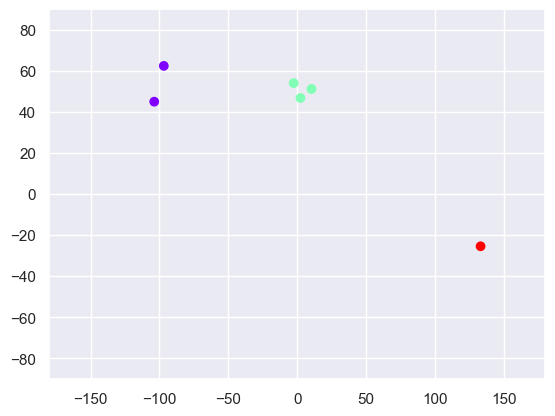

In [14]:
plt.scatter(data["Longitude"], data["Latitude"],c = data_with_cluster["Clusters"],cmap = "rainbow" )
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

you can adjust the cluster at any given point by inputing the value inside the KMeans ane rerun

the cluster information is contained in the data_with_cluster["Clusters"] and the colour is rainbow

how to use the last information number which we did not use in the first illustration

In [16]:
mapped_data = data.copy()
mapped_data["Language"] = mapped_data["Language"].map({"English":0, "French":1, "German":2})
mapped_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


select the features

In [30]:
x = mapped_data.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [36]:
# include the latitude and longitude to clusger bases on geographical
x = mapped_data.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


perform cluster

In [42]:
kmean = KMeans(2)
kmean.fit(x)

KMeans(n_clusters=2)

clustering result

In [44]:
identified_cluster = kmean.fit_predict(x)
identified_cluster

array([0, 0, 0, 0, 0, 1])

creating adata frame

In [45]:
data_with_cluster = mapped_data.copy()
data_with_cluster["Clusters"] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


plot the cluster

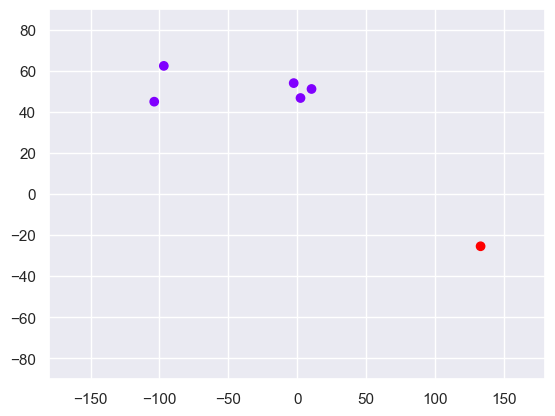

In [46]:
plt.scatter(mapped_data["Longitude"], mapped_data["Latitude"],c = data_with_cluster["Clusters"],cmap = "rainbow" )
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

you can adjust and add the latitude and longitude by iloc[:,1:4] and see base on geographical location

you can change the cluster value to 2 and see the reaction

wcss

In [43]:
kmean.inertia_

13208.958119999996

to solve the elbow, we need to solve the problem with 1,2,3,4,5,6 clusters and calculate the wcss for ech of them. lets do it with a loop

In [48]:
wcss = []
for i in range(1,7):
    kmean = KMeans(i)
    kmean.fit(x)
    wcss_iter = kmean.inertia_
    wcss.append(wcss_iter)
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

the elbow method

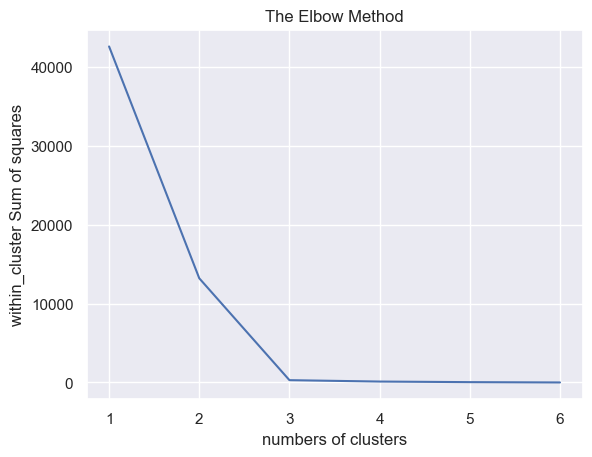

In [49]:
number_cluster = range(1,7)
plt.plot(number_cluster, wcss)
plt.title("The Elbow Method")
plt.xlabel("numbers of clusters")
plt.ylabel("within_cluster Sum of squares")
plt.show()

a two cluster solution will be suboptimal as the leap from 2 to 3 is very big